In [2]:
!git clone https://github.com/chembl/FPSim2.git

Cloning into 'FPSim2'...
remote: Enumerating objects: 1495, done.
remote: Counting objects: 100% (346/346), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 1495 (delta 194), reused 255 (delta 130), pack-reused 1149
Receiving objects: 100% (1495/1495), 6.14 MiB | 10.80 MiB/s, done.
Resolving deltas: 100% (867/867), done.


In [3]:
!pip install FPSim2/

Processing ./FPSim2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 11.9 MB/s eta 0:00:00
  Created wheel for FPSim2: filename=FPSim2-0.5.1-cp310-cp310-linux_x86_64.whl size=2339816 sha256=d6e16d737d74bba80b86b2ea77e4e9c2a6400be31c9c97c0653e20175f63871e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tz0ofncp/wheels/0d/33/cd/5adbdd4a2dc49f0619ad80b7433ce4fdfc1e9964e5abea6d4d
Successfully built FPSim2
  Attempting uninstall: blosc2
    Found existing installation: blosc2 2.0.0
    Uninstalling blosc2-2.0.0:
      Successfully uninstalled blosc2-2.0.0
  Attempting u

In [4]:
!pip install rdkit

DataCreation

In [5]:
from FPSim2.io import create_db_file

In [12]:
smiFilePath = '/content/CHEMBL.smi'

In [13]:
import h5py
hdFileName = '/content/chembl.h5'

In [14]:
create_db_file(smiFilePath, hdFileName, 'Morgan', {'radius': 2, 'nBits': 2048})

Similarity identification

In [15]:
import pandas as pd
from FPSim2 import FPSim2Engine
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [16]:
from FPSim2 import FPSim2Engine

In [17]:
fp_filename = '/content/chembl.h5'
query = 'CCNCC(=O)Nc1c(C)cccc1C'

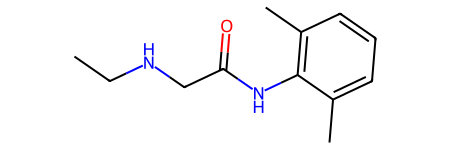

In [18]:
Simquerry = Chem.MolFromSmiles(query)
Simquerry

In [19]:
fpe = FPSim2Engine(fp_filename)

In [20]:
results = fpe.similarity(query, 0.7, n_workers=5)

In [21]:
results

array([(1028, 1.)],
      dtype={'names': ['mol_id', 'coeff'], 'formats': ['<u4', '<f4'], 'offsets': [4, 8], 'itemsize': 12})

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame(results)
df['mol_id'] = pd.to_numeric(df['mol_id'])

In [24]:
df

,mol_id,coeff
0,1028,1.0


In [25]:
df.dtypes

mol_id     uint32
coeff     float32
dtype: object

In [26]:
s = df['mol_id']
s

0    1028
Name: mol_id, dtype: uint32

In [29]:
theResults = []
with open ('/content/CHEMBL.smi') as f:
  for line in f:
    smiles, mol_id = line.split('\t', 1)
    for myentry in s:
      if int (mol_id) == myentry:
        print(line)
        theresult = smiles, mol_id.strip()
        theResults.append(theresult)


CCNCC(=O)Nc1c(C)cccc1C	1028



In [30]:
theResults

[('CCNCC(=O)Nc1c(C)cccc1C', '1028')]

In [31]:
df2 = pd.DataFrame(theResults)
df2.columns = ("smiles","mol_id")
df2['mol_id'] = pd.to_numeric(df2['mol_id'])
df2

,smiles,mol_id
0,CCNCC(=O)Nc1c(C)cccc1C,1028


In [32]:
combdf = pd.merge(df,df2, left_on = 'mol_id', right_on ='mol_id')

In [33]:
combdf

,mol_id,coeff,smiles
0,1028,1.0,CCNCC(=O)Nc1c(C)cccc1C


,mol_id,coeff,smiles,Molecules
0,1028,1.0,CCNCC(=O)Nc1c(C)cccc1C,

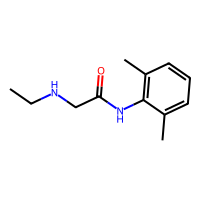

In [34]:
PandasTools.AddMoleculeColumnToFrame(combdf,'smiles','Molecules')
combdf

Tversky Similarity Search

In [35]:
from rdkit import Chem

In [36]:
from FPSim2 import FPSim2Engine

results = fpe.tversky(query, 0.7,0.5,0.5, n_workers=1)
results

array([(   1028, 1.        ), (     79, 0.7368421 ),
       (1581191, 0.73333335), (1505700, 0.7164179 )],
      dtype={'names': ['mol_id', 'coeff'], 'formats': ['<u4', '<f4'], 'offsets': [4, 8], 'itemsize': 12})

In [37]:
df = pd.DataFrame(results)
df['mol_id'] = pd.to_numeric(df['mol_id'])

In [38]:
df

,mol_id,coeff
0,1028,1.000000
1,79,0.736842
2,1581191,0.733333
3,1505700,0.716418


In [39]:
df.dtypes

mol_id     uint32
coeff     float32
dtype: object

In [40]:
s = df['mol_id']
s

0       1028
1         79
2    1581191
3    1505700
Name: mol_id, dtype: uint32

In [41]:
theResults = []
with open ('/content/CHEMBL.smi') as f:
  for line in f:
    smiles, mol_id = line.split('\t', 1)
    for myentry in s:
      if int (mol_id) == myentry:
        print(line)
        theresult = smiles, mol_id.strip()
        theResults.append(theresult)

CCNCC(=O)Nc1c(C)cccc1C	1028

CCc1cccc(C)c1NC(=O)CNCc1ccccc1.O=C(O)C(=O)O	1505700

Cc1cccc(C)c1NC(=O)CNC(=O)c1ccccc1	1581191

CCN(CC)CC(=O)Nc1c(C)cccc1C	79



In [42]:
theResults

[('CCNCC(=O)Nc1c(C)cccc1C', '1028'),
 ('CCc1cccc(C)c1NC(=O)CNCc1ccccc1.O=C(O)C(=O)O', '1505700'),
 ('Cc1cccc(C)c1NC(=O)CNC(=O)c1ccccc1', '1581191'),
 ('CCN(CC)CC(=O)Nc1c(C)cccc1C', '79')]

In [43]:
df2 = pd.DataFrame(theResults)
df2.columns = ("smiles","mol_id")
df2['mol_id'] = pd.to_numeric(df2['mol_id'])
df2

,smiles,mol_id
0,CCNCC(=O)Nc1c(C)cccc1C,1028
1,CCc1cccc(C)c1NC(=O)CNCc1ccccc1.O=C(O)C(=O)O,1505700
2,Cc1cccc(C)c1NC(=O)CNC(=O)c1ccccc1,1581191
3,CCN(CC)CC(=O)Nc1c(C)cccc1C,79


In [44]:
combdf = pd.merge(df,df2, left_on = 'mol_id', right_on ='mol_id')
combdf

,mol_id,coeff,smiles
0,1028,1.000000,CCNCC(=O)Nc1c(C)cccc1C
1,79,0.736842,CCN(CC)CC(=O)Nc1c(C)cccc1C
2,1581191,0.733333,Cc1cccc(C)c1NC(=O)CNC(=O)c1ccccc1
3,1505700,0.716418,CCc1cccc(C)c1NC(=O)CNCc1ccccc1.O=C(O)C(=O)O


,mol_id,coeff,smiles,Molecules
0,1028,1.000000,CCNCC(=O)Nc1c(C)cccc1C,
1,79,0.736842,CCN(CC)CC(=O)Nc1c(C)cccc1C,
2,1581191,0.733333,Cc1cccc(C)c1NC(=O)CNC(=O)c1ccccc1,
3,1505700,0.716418,CCc1cccc(C)c1NC(=O)CNCc1ccccc1.O=C(O)C(=O)O,

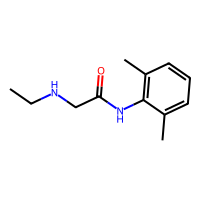
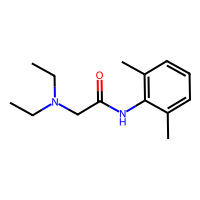
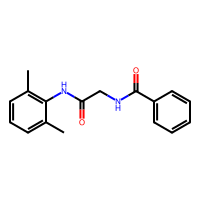
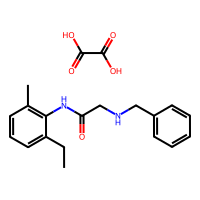

In [45]:
PandasTools.AddMoleculeColumnToFrame(combdf,'smiles','Molecules')
combdf